Using a calibration pattern (e.g., a checkerboard), perform camera 
calibration to obtain intrinsic and extrinsic parameters. Display the 
calibration results and the reprojection error.

In [4]:
import numpy as np
import cv2
import glob

# Configuration - adjust these values
images_folder = "checkboa"  # Folder containing checkerboard images
pattern_size = (6, 9)                 # Inner corners (rows, columns)
square_size = 0.025                   # Square size in meters (25mm)

# Prepare 3D object points (real world coordinates)
objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)
objp *= square_size  # Scale to real-world size

# Arrays to store points
object_points = []  # 3D points in real world
image_points = []   # 2D points in image plane

# Find all calibration images
images = glob.glob(f'{images_folder}/*.jpg') + glob.glob(f'{images_folder}/*.png')

# Process each image
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find chessboard corners
    found, corners = cv2.findChessboardCorners(gray, pattern_size, None)
    
    if found:
        object_points.append(objp)
        
        # Refine corner positions
        corners_refined = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1),
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        )
        image_points.append(corners_refined)
        
        # Visualize detected corners
        cv2.drawChessboardCorners(img, pattern_size, corners_refined, found)
        cv2.imshow('Detected Corners', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Perform camera calibration
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
    object_points, image_points, gray.shape[::-1], None, None
)

# Display results
print("=== Calibration Results ===")
print(f"Re-projection Error: {ret:.4f} (lower is better)")

print("\nCamera Matrix (Intrinsic Parameters):")
print("[[fx  0  cx]")
print(" [ 0 fy  cy]")
print(" [ 0  0   1]]")
print(camera_matrix)

print("\nDistortion Coefficients (k1, k2, p1, p2, k3):")
print(dist_coeffs)

print("\nFirst Extrinsic Parameters:")
print("Rotation Vector:", rvecs[0].flatten())
print("Translation Vector:", tvecs[0].flatten())

# Save calibration data for later use
np.savez("camera_calibration.npz",
         camera_matrix=camera_matrix,
         dist_coeffs=dist_coeffs)

=== Calibration Results ===
Re-projection Error: 4.9950 (lower is better)

Camera Matrix (Intrinsic Parameters):
[[fx  0  cx]
 [ 0 fy  cy]
 [ 0  0   1]]
[[ 631.38880826    0.         -211.80045351]
 [   0.          442.74484021 -116.37055388]
 [   0.            0.            1.        ]]

Distortion Coefficients (k1, k2, p1, p2, k3):
[[ 1.43434672e-03  1.09446006e-03 -2.32401954e-02 -2.08449892e-02
  -3.80947269e-05]]

First Extrinsic Parameters:
Rotation Vector: [ 0.1495812  -0.05327068 -1.56149978]
Translation Vector: [0.06913892 0.2019305  0.07179684]


<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4556\3833294049.py:7: SyntaxWarning: invalid escape sequence '\c'
  x = cv2.imread('checkboa\check.png')  # x: original image


Camera Matrix:
 [[2.72648327e+04 0.00000000e+00 4.57514962e+02]
 [0.00000000e+00 2.77034845e+04 4.53071278e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients:
 [[ 1.61086556e+00 -3.05238052e-02 -6.89238759e-02 -1.27344142e-03
  -1.26237112e-05]]
Reprojection Error: 0.23173441722343074


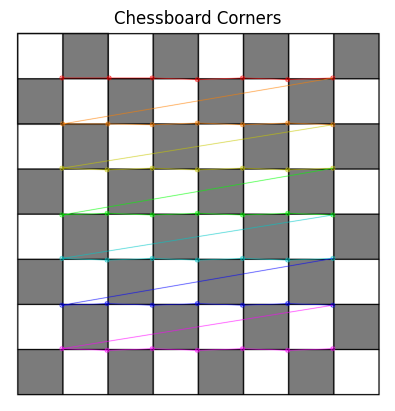

In [8]:
# 6. Camera Calibration using Chessboard
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to grayscale
x = cv2.imread('checkboa\check.png')  # x: original image
y = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)    # y: grayscale image

# Try to find chessboard corners (7x7 pattern)
found, corners = cv2.findChessboardCorners(y, (7, 7), None)

if found:
    # Create 3D points (z = 0)
    obj = np.zeros((49, 3), np.float32)
    obj[:, :2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

    # Calibrate the camera
    _, m, d, r, t = cv2.calibrateCamera([obj], [corners], y.shape[::-1], None, None)
    # m: camera matrix, d: distortion, r: rotation, t: translation

    # Project 3D points back to image
    proj, _ = cv2.projectPoints(obj, r[0], t[0], m, d)

    # Compute reprojection error
    e = cv2.norm(corners, proj) / len(proj)

    # Show results
    print("Camera Matrix:\n", m)
    print("Distortion Coefficients:\n", d)
    print("Reprojection Error:", e)

    # Draw corners
    x = cv2.drawChessboardCorners(x, (7, 7), corners, found)

    # Show image
    plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
    plt.title("Chessboard Corners")
    plt.axis('off')
    plt.show()
else:
    print("Chessboard not found.")